In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [117]:

im = cv2.imread('images/test3.jpg')

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.blur(im_gray, (3, 3))


w, h = im_gray.shape
circles = cv2.HoughCircles(im_gray, cv2.HOUGH_GRADIENT, 1.05, 20, param1 = 50,
    param2 = 30, minRadius = 25, maxRadius = 40)
print(circles)


circles = np.round(circles[0, :]).astype(np.int32)
circles = sorted(circles, key = lambda x: x[1])
len(circles)

[[[ 825.82495  2077.4248     36.76    ]
  [ 826.87494  1534.575      36.445   ]
  [ 824.77496  1335.075      35.92    ]
  [ 825.82495  2179.275      34.135   ]
  [ 825.82495  1976.6249     33.295   ]
  [ 827.925    2588.775      36.235   ]
  [ 827.925    2486.9248     34.345   ]
  [ 824.77496  3325.8748     36.97    ]
  [ 828.975    2792.4749     37.075   ]
  [ 828.975    2689.575      33.61    ]
  [ 825.82495  3221.9248     33.82    ]
  [ 826.87494  1875.825      34.555   ]
  [ 824.77496  1234.2749     36.97    ]
  [ 826.87494  3119.025      37.075   ]
  [ 826.87494  1433.7749     35.5     ]
  [ 623.175      92.924995   39.385   ]]]


16

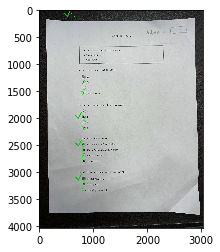

In [116]:

correct = {1: 'C', 2: 'D', 3: 'B', 4: 'A'}
mapping = {0:"A", 1:"B", 2:"C", 3:"D"}
res = dict()
intensities = []
locations = []
for (x, y, r) in circles:
#     print(x,y,r)
    mask = np.zeros(im_gray.shape)
    cv2.circle(im, (x, y), r, (0,255,0), 4)
    cv2.circle(mask, (x, y), r, 1, -1)
    intensity = np.mean(mask * im_gray)
    intensities.append(intensity)
    locations.append((intensity,x,y))
plt.imshow(im)

    

In [ ]:


# print(locations)
num_questions = 4
for i in range(num_questions):
    res[i+1] = [mapping[np.argmin(intensities[4*i:4*i+4])], np.min(intensities[4*i:4*i+4])]

for (userAnswer,userIntensity), answer in zip(res.items(), correct):
#     print(userAnswer, userIntensity)
    if userAnswer == answer:
#         print('same', userIntensity)
        for intensity, x,y, in locations:
#             print(intensity,x,y)
            if intensity == userIntensity[1]:
                cv2.line(im, (x-100, y+25), (x-150, y-25), (0, 200, 20), 20)
                cv2.line(im, (x-100, y+25), (x-50, y-75), (0, 200, 20), 20)
                
    else:
        cv2.line(im, (x-150, y-25), (x-100, y+25), (0, 20, 200), 20)
        cv2.line(im, (x-100, y-25), (x-150, y+25), (0, 20, 200), 20)

# for intensity, loc in locations:
    
# cv2.line(im, (202, 220), (800, 400), (0, 20, 200), 10)
# print(res)
if res  == correct:
    print('good')
plt.imshow(im)

cv2.imwrite("marked.jpeg", im)